In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import wget
import seaborn as sns
import ipywidgets as pywidgets
import urllib3
import tempfile

from io import StringIO
from ipywidgets import interact
from itertools import combinations

# Download data

In [5]:
http = urllib3.PoolManager()
with http.request('GET', 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls', preload_content=False) as r:
    with tempfile.NamedTemporaryFile() as f:
        f.write(r.data)
        dataframe = pd.read_excel(f.name, names=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                                                'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive strength'])

/home/kacper/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [6]:
dataframe.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Compressive strength  
count           1030.000000  
mean              35.817836  
std               16.705679  
min                2.331808  
25%               23.707115  
50%               34.442774  
75%               46.136287  
max               82.599225

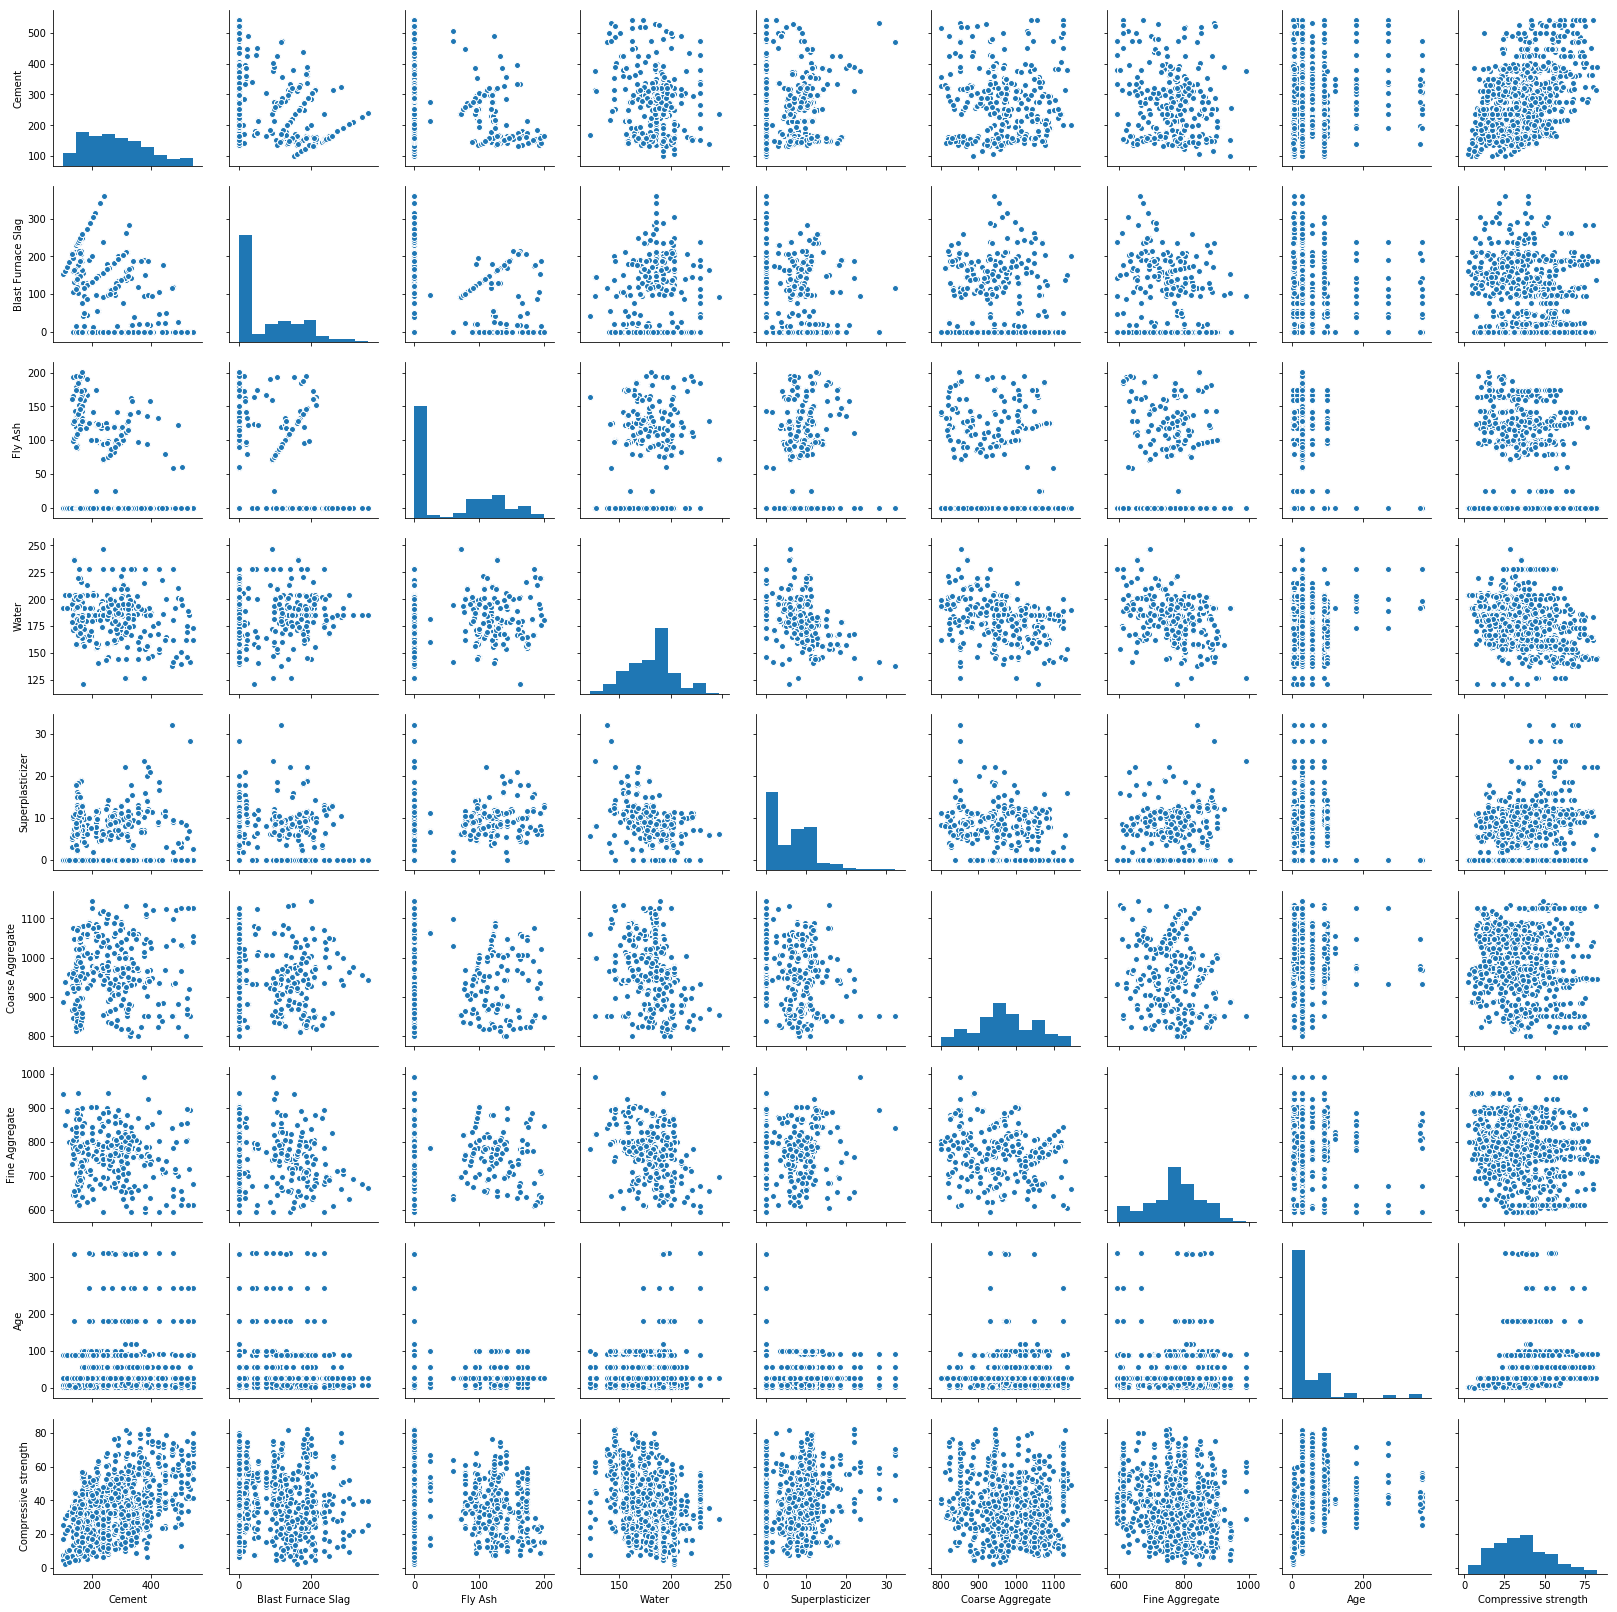

In [7]:
sns.pairplot(dataframe)

In [8]:
columns = list(dataframe.columns)
dropdown_1 = pywidgets.Dropdown(
    options=columns,
    value=columns[0],
    description='Column 1:',
    disabled=False,
)
dropdown_2 = pywidgets.Dropdown(
    options=columns,
    value=columns[1],
    description='Column 2:',
    disabled=False,
)

In [9]:
@interact(column_1=dropdown_1, column_2=dropdown_2)
def plot_jointly(column_1, column_2):
    sns.jointplot(x=column_1, y=column_2, data=dataframe)

interactive(children=(Dropdown(description='Column 1:', options=('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive strength'), value='Cement'), Dropdown(description='Column 2:', index=1, options=('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive strength'), value='Blast Furnace Slag'), Output()), _dom_classes=('widget-interact',))

In [10]:
dataframe.corr()

Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement                1.000000           -0.275193 -0.397475 -0.081544   
Blast Furnace Slag   -0.275193            1.000000 -0.323569  0.107286   
Fly Ash              -0.397475           -0.323569  1.000000 -0.257044   
Water                -0.081544            0.107286 -0.257044  1.000000   
Superplasticizer      0.092771            0.043376  0.377340 -0.657464   
Coarse Aggregate     -0.109356           -0.283998 -0.009977 -0.182312   
Fine Aggregate       -0.222720           -0.281593  0.079076 -0.450635   
Age                   0.081947           -0.044246 -0.154370  0.277604   
Compressive strength  0.497833            0.134824 -0.105753 -0.289613   

                      Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                        0.092771         -0.109356       -0.222720   
Blast Furnace Slag            0.043376         -0.283998       -0.281593   
Fly Ash                       0.377340         -0.009977        0.079076   
Water                        -0.657464         -0.182312       -0.450635   
Superplasticizer              1.000000         -0.266303        0.222501   
Coarse Aggregate             -0.266303          1.000000       -0.178506   
Fine Aggregate                0.222501         -0.178506        1.000000   
Age                          -0.192717         -0.003016       -0.156094   
Compressive strength          0.366102         -0.164928       -0.167249   

                           Age  Compressive strength  
Cement                0.081947              0.497833  
Blast Furnace Slag   -0.044246              0.134824  
Fly Ash              -0.154370             -0.105753  
Water                 0.277604             -0.289613  
Superplasticizer     -0.192717              0.366102  
Coarse Aggregate     -0.003016             -0.164928  
Fine Aggregate       -0.156094             -0.167249  
Age                   1.000000              0.328877  
Compressive strength  0.328877              1.000000

In [11]:
dataframe.cov()

Cement  Blast Furnace Slag      Fly Ash  \
Cement                10921.742654        -2481.359426 -2658.350754   
Blast Furnace Slag    -2481.359426         7444.083725 -1786.607591   
Fly Ash               -2658.350754        -1786.607591  4095.548093   
Water                  -181.989792          197.678554  -351.297119   
Superplasticizer         57.914616           22.355312   144.250263   
Coarse Aggregate       -888.608507        -1905.210572   -49.644195   
Fine Aggregate        -1866.151111        -1947.911259   405.736351   
Age                     540.991817         -241.150380  -624.064749   
Compressive strength    869.147620          194.329352  -113.061378   

                           Water  Superplasticizer  Coarse Aggregate  \
Cement               -181.989792         57.914616       -888.608507   
Blast Furnace Slag    197.678554         22.355312      -1905.210572   
Fly Ash              -351.297119        144.250263        -49.644195   
Water                 456.060245        -83.870964       -302.724310   
Superplasticizer      -83.870964         35.682602       -123.687453   
Coarse Aggregate     -302.724310       -123.687453       6045.656228   
Fine Aggregate       -771.573474        106.562027      -1112.795163   
Age                   374.496504        -72.720603        -14.811273   
Compressive strength -103.322287         36.533800       -214.229751   

                      Fine Aggregate          Age  Compressive strength  
Cement                  -1866.151111   540.991817            869.147620  
Blast Furnace Slag      -1947.911259  -241.150380            194.329352  
Fly Ash                   405.736351  -624.064749           -113.061378  
Water                    -771.573474   374.496504           -103.322287  
Superplasticizer          106.562027   -72.720603             36.533800  
Coarse Aggregate        -1112.795163   -14.811273           -214.229751  
Fine Aggregate           6428.099159  -790.565577           -224.010746  
Age                      -790.565577  3990.437729            347.062648  
Compressive strength     -224.010746   347.062648            279.079717